In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 2s 0us/step


In [55]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

# Get the subdirectories in the data directory
class_dirs = [item for item in data_dir.glob('*') if item.is_dir()]

# Count the number of images in each class
class_counts = {}
for class_dir in class_dirs:
    class_name = class_dir.name
    count = len(list(class_dir.glob('*')))
    class_counts[class_name] = count

# Print the count of each class
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")

Class 'roses': 641 images
Class 'tulips': 799 images
Class 'sunflowers': 699 images
Class 'daisy': 633 images
Class 'dandelion': 898 images


/root/.keras/datasets/flower_photos/roses/19919867648_043cf02fc3.jpg


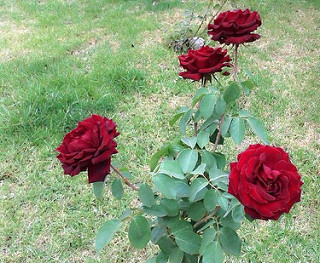

In [26]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[1]))


In [67]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2569 files for training.


In [68]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation transformations
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # Split the data into training and validation sets
)

# Create the training dataset with data augmentation
train_ds = data_augmentation.flow_from_directory(
    data_dir,
    subset="training",  # Use the training subset
    seed=123,
    target_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2939 images belonging to 5 classes.


In [10]:
# Get the number of classes
num_classes = train_ds.num_classes
print("Number of classes:", num_classes)

Number of classes: 5


In [87]:
# Define the data augmentation transformations
data_augmentation = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

# Create the training dataset with data augmentation
train_ds = data_augmentation.flow_from_directory(
    data_dir,
    subset="training",
    seed=123,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # Use sparse categorical labels
)

# Create the validation dataset without data augmentation
val_ds = data_augmentation.flow_from_directory(
    data_dir,
    subset="validation",
    seed=123,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse'  # Use sparse categorical labels
)

# Get the number of classes
num_classes = train_ds.num_classes

# Define the CNN model
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model with validation data
epochs = 10
model.fit(train_ds, epochs=epochs, validation_data=val_ds)


Found 2572 images belonging to 5 classes.
Found 1098 images belonging to 5 classes.
Epoch 1/10
81/81 [==============================] - 54s 643ms/step - loss: 1.3546 - accuracy: 0.4253 - val_loss: 1.1476 - val_accuracy: 0.5383
Epoch 2/10
81/81 [==============================] - 52s 638ms/step - loss: 1.0949 - accuracy: 0.5517 - val_loss: 1.0544 - val_accuracy: 0.5956
Epoch 3/10
81/81 [==============================] - 52s 638ms/step - loss: 0.9944 - accuracy: 0.6081 - val_loss: 0.9729 - val_accuracy: 0.6184
Epoch 4/10
81/81 [==============================] - 51s 637ms/step - loss: 0.9287 - accuracy: 0.6388 - val_loss: 0.9587 - val_accuracy: 0.6129
Epoch 5/10
81/81 [==============================] - 58s 713ms/step - loss: 0.8413 - accuracy: 0.6773 - val_loss: 0.8885 - val_accuracy: 0.6530
Epoch 6/10
81/81 [==============================] - 52s 640ms/step - loss: 0.8143 - accuracy: 0.6777 - val_loss: 0.9089 - val_accuracy: 0.6403
Epoch 7/10
81/81 [==============================] - 51s 63

In [88]:
class_names = list(train_ds.class_indices.keys())
print("Class names:", class_names)

Class names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [114]:
# Preprocess the new image
new_image = tf.keras.preprocessing.image.load_img('sun2.jpg', target_size=(img_height, img_width))
new_image = tf.keras.preprocessing.image.img_to_array(new_image)


# Expand dimensions to match the batch size
new_image = tf.expand_dims(new_image, axis=0)

# Make the prediction
predictions = model.predict(new_image)

# Get the predicted class label
predicted_class = tf.argmax(predictions[0]).numpy()

# Print the predicted class label
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 28ms/step
Predicted class: 3


In [121]:
class_scores = np.max(predictions[0])

class_scores

0.65070873

In [105]:
tf.keras.models.save_model(model,'f_model.hdf5')

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import cv2
from PIL import Image, ImageOps
import numpy as np

class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('f_model.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()
st.write("""
         # Flower Classification
         """
         )

file = st.file_uploader("Please upload an image", type=["jpg", "png"])

st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):

        size = (224,224)
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.

        img_reshape = img[np.newaxis,...]

        prediction = model.predict(img_reshape)

        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    prediction = import_and_predict(image, model)
    score = tf.nn.softmax(prediction[0])
    disp=f"This image most likely belongs to {class_names[np.argmax(score)]} with a {100 * np.max(score) :.2f} percent confidence."

    st.write(disp)

Overwriting app.py
